# Project 02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [5]:
# read the data set
df = pd.read_csv("./Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [6]:
# first check the shape of the data
print("Shape of the data is \n", df.shape)

Shape of the data is 
 (30641, 15)


In [7]:
# now check the columns of the data
print("All columns in data \n", df.columns)

All columns in data 
 Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')


In [8]:
# now check the null values in our data set
print("Null values \n", df.isnull().sum())

Null values 
 Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [16]:
# now check the basic info of data
print("Basic info of data \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB
Basic info of data 
 None


## Cleaning the data

In [15]:
# remove the unnamed column because we do not need of it
df.drop(["Unnamed: 0"], inplace=True, axis=1)

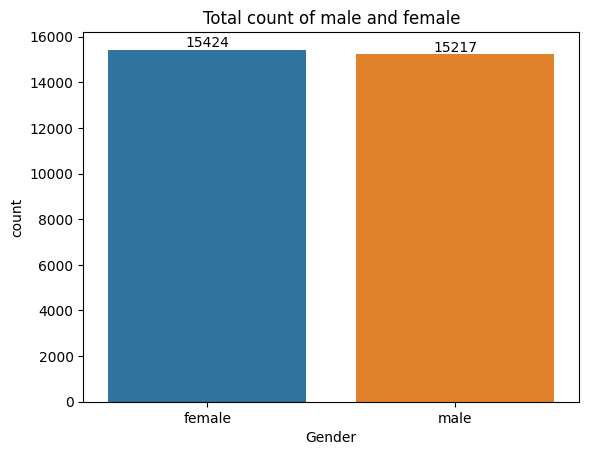

In [40]:
plt.title("Total count of male and female")
ax = sea.countplot(x="Gender",data=df,hue="Gender")
for bar in ax.containers:
    ax.bar_label(bar)

## Calculate the score on bases of parent education

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
master's degree     72.336134     75.832921     76.356896
bachelor's degree   70.466627     73.062020     73.331069
associate's degree  68.365586     71.124324     70.299099
some college        66.390472     69.179708     68.501432
high school         64.435731     67.213997     65.421136
some high school    62.584013     65.510785     63.632409


<Axes: ylabel='ParentEduc'>

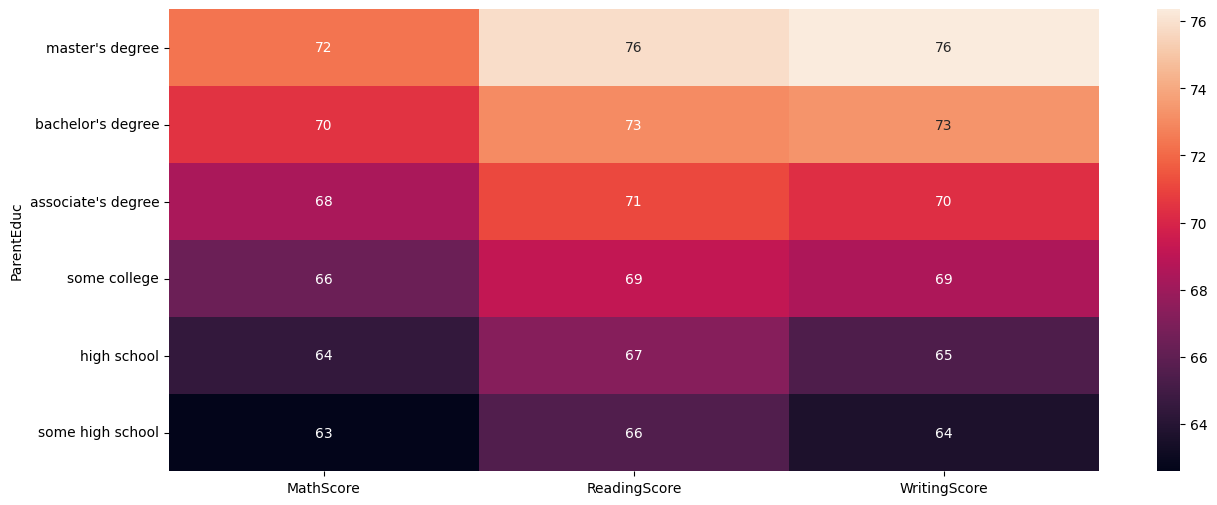

In [56]:
group = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).sort_values(by=["MathScore","ReadingScore","WritingScore"],ascending=False)
print(group)
plt.figure(figsize=(15,6))
sea.heatmap(group, annot=True)

## Calculate the score on bases of  Parent Marital Status

In [71]:
# first check is there any null values in ParentMaritalStatus
print("Null values in ParentMaritalStatus \n", df["ParentMaritalStatus"].isnull().sum())

Null values in ParentMaritalStatus 
 0


In [70]:
# show get  1190 null values in ParentMaritalStatus columns
# now fill all these null values

common_values = df["ParentMaritalStatus"].mode()
df["ParentMaritalStatus"].fillna(value=common_values[0],inplace=True)


<Axes: ylabel='ParentMaritalStatus'>

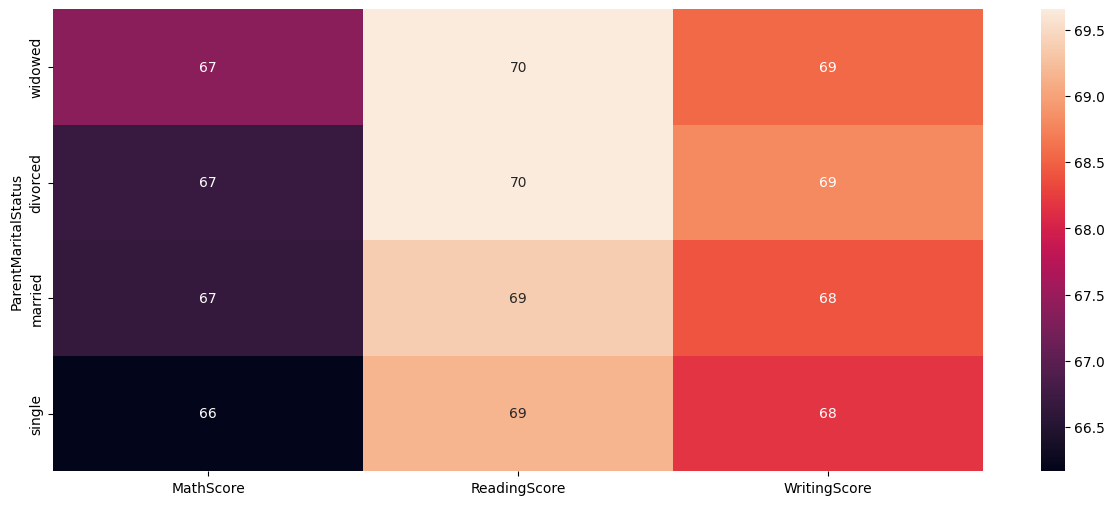

In [74]:
# now there is no any null values in ParentMaritalStatus so calculate the data
ParentMaritalStatus_group = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).sort_values(by=["MathScore","ReadingScore","WritingScore"],ascending=False)
plt.figure(figsize=(15,6))
sea.heatmap(ParentMaritalStatus_group, annot=True)

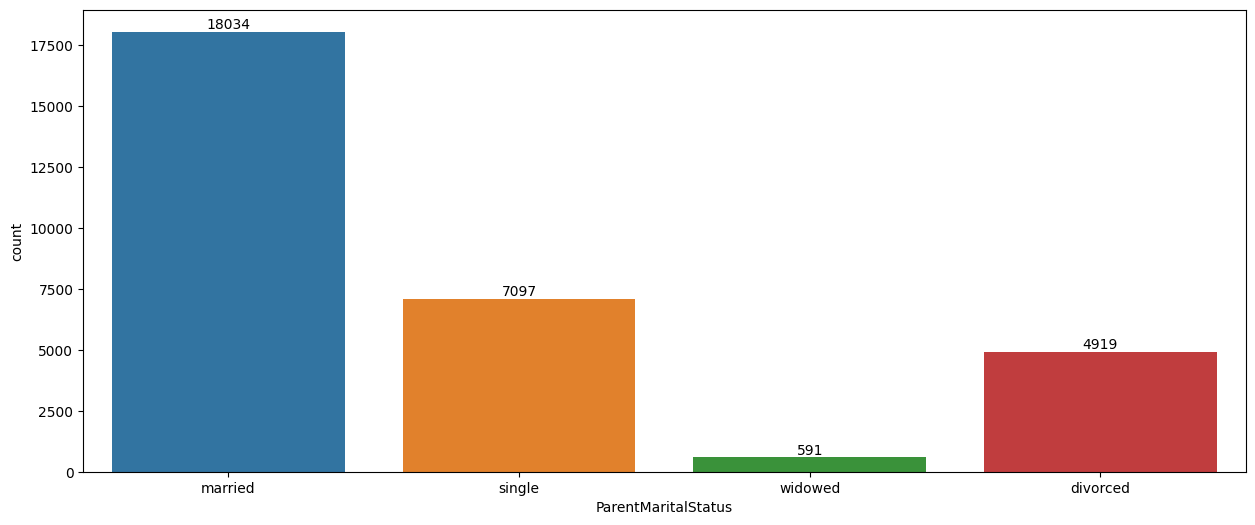

In [78]:
# now calculate the ParentMaritalStatus
plt.figure(figsize=(15,6))
ax= sea.countplot(data=df , x="ParentMaritalStatus",hue="ParentMaritalStatus")
for bar in ax.containers:
    ax.bar_label(bar)